<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/data%20vizulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = "/content/drive/MyDrive/datamining/BostonHousing.csv"

housing_df = pd.read_csv(file_path)
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [4]:
housing_df = housing_df.rename(columns ={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


## Load the Matrak Dataset


In [5]:
file_path = "/content/drive/MyDrive/datamining/Amtrak.csv"
amtrak_df = pd.read_csv(file_path)

amtrak_df.head()

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [10]:
amtrak_df['Date'] = pd.to_datetime(amtrak_df['Month'], format ='%d/%m/%Y')
amtrak_df.head()


,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01


In [11]:
amtrak_df.dtypes

Month                object
Ridership           float64
Date         datetime64[ns]
dtype: object

## Basic Plots: Line Plots, Bar Chart, Scatter Plot

### Matplot lib version

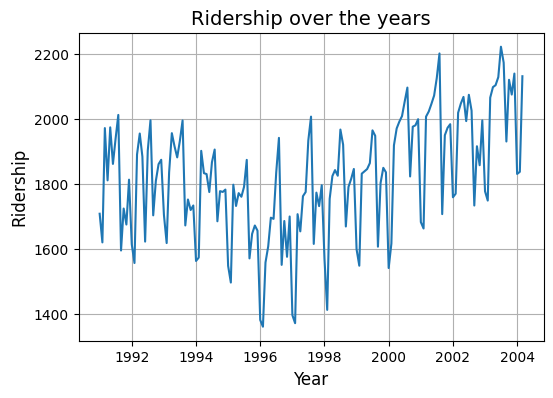

In [19]:
import matplotlib.pyplot as plt
plt.subplots(figsize =(6,4))
#Line Plot for ridership over the years
plt.plot(amtrak_df['Date'], amtrak_df['Ridership'], color = 'C0')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ridership', fontsize = 12)
plt.title('Ridership over the years', fontsize = 14)
plt.grid(True)
plt.show()

### Scatter Plot for Housing Data showing relationship between LSTAT and MEDV

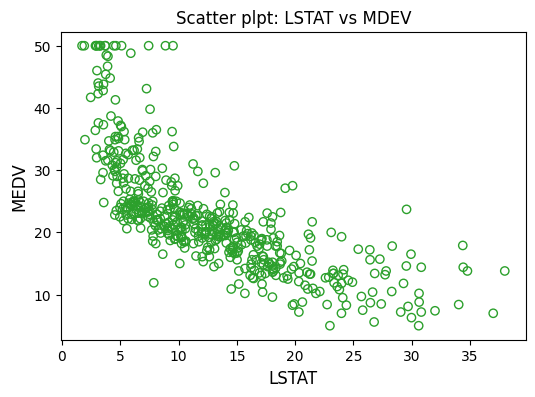

In [25]:
plt.subplots(figsize  =(6,4))
plt.scatter(housing_df['LSTAT'], housing_df ['MEDV'], color = 'C2', facecolor ='none')
plt.xlabel('LSTAT', fontsize= 12)
plt.ylabel('MEDV', fontsize = 12)
plt.title('Scatter plpt: LSTAT vs MDEV')
plt.show()

### Bar Chart showing mean MEDV for each category fo CHAS


#### using Matplotlib

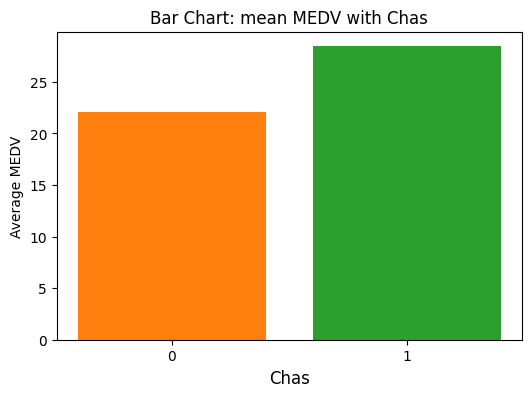

In [31]:
mean_medv_per_chas = housing_df.groupby('CHAS'). mean().MEDV
plt.subplots(figsize =(6, 4))
plt.bar(mean_medv_per_chas.index, mean_medv_per_chas, color = ['C1','C2'])
plt.xticks([0,1], label = ['0', '1'])
plt.xlabel ('Chas', fontsize=12)
plt.ylabel ('Average MEDV')
plt.title ('Bar Chart: mean MEDV with Chas')
plt.show()

#### Bar plot using seaborn


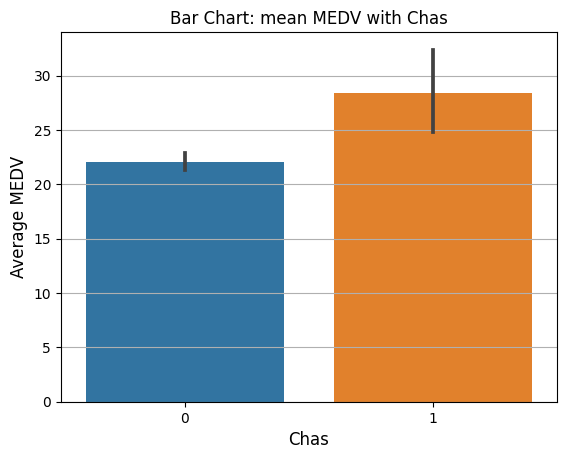

In [35]:
import seaborn as sns
import numpy as np
sns.barplot(x= 'CHAS', y = 'MEDV', data= housing_df, estimator = np.mean)
plt.xlabel ('Chas', fontsize=12)
plt.ylabel ('Average MEDV', fontsize=12)
plt.title ('Bar Chart: mean MEDV with Chas')
plt.grid (axis = 'y')
plt.show()

## Distribution Plots

#### Using Matplot lib

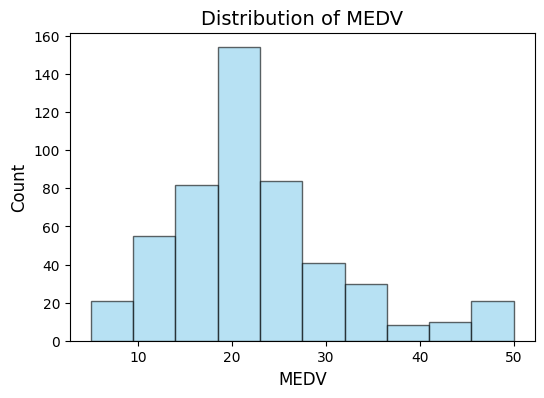

In [36]:
plt.subplots (figsize = (6,4))
plt.hist(housing_df['MEDV'], color = 'skyblue', edgecolor = 'black', alpha=  0.6)
plt.xlabel ('MEDV',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title ('Distribution of MEDV', fontsize = 14)
plt.show()

## BoxPlot

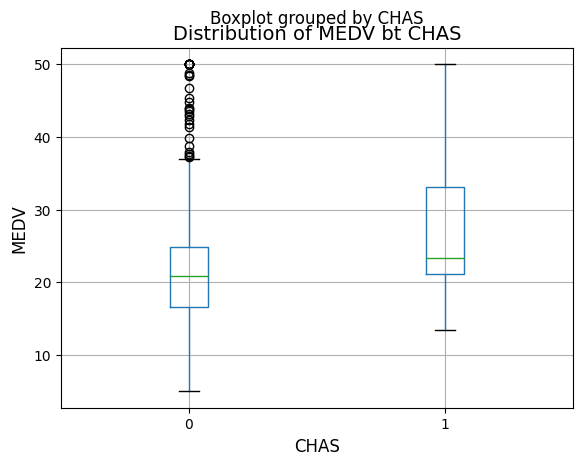

In [40]:

housing_df.boxplot( column = 'MEDV', by ='CHAS', grid = True)
plt.xlabel ('CHAS',fontsize = 12)
plt.ylabel('MEDV', fontsize = 12)
plt.title ('Distribution of MEDV bt CHAS', fontsize = 14)
plt.show()

BOX plot using seaborn


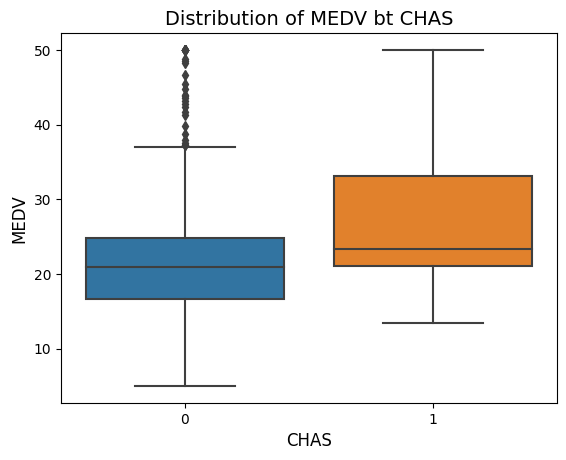

In [43]:
sns.boxplot(x= "CHAS", y = 'MEDV', data = housing_df)
plt.xlabel('CHAS',fontsize = 12)
plt.ylabel('MEDV', fontsize = 12)
plt.title('Distribution of MEDV bt CHAS', fontsize = 14)
plt.show()

side by side boxplot

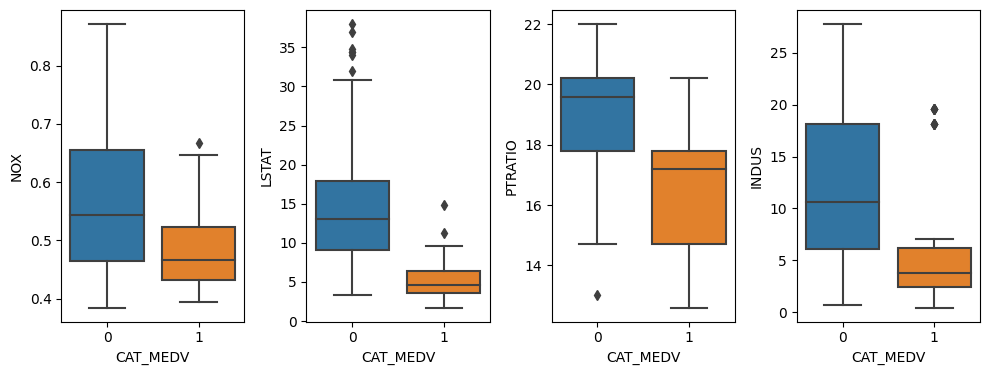

In [48]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize =(10,4))
sns.boxplot (x= 'CAT_MEDV', y ='NOX', data = housing_df, ax= axes[0])
sns.boxplot (x= 'CAT_MEDV', y ='LSTAT', data = housing_df, ax= axes[1])
sns.boxplot (x= 'CAT_MEDV', y ='PTRATIO', data = housing_df, ax= axes[2])
sns.boxplot (x= 'CAT_MEDV', y ='INDUS', data = housing_df, ax= axes[3])

for ax in axes:
  ax.set_xlabel('CAT_MEDV')
  plt.suptitle('')
  plt.tight_layout()